

# Project: Investigate a Dataset - [gun_data.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
>I have downloaded FBI gun check data which provides information about number of permits per state every month from 1998 to 2022 also it provides data about types of guns and if there were checks including multiple gun per buyer these data give us insights about gun possession in  usa but not actual representation of gun possession and sales.



### Question(s) for Analysis

#### Q1 which year has the highest permits ?
#### Q2 top five states that have gun permits?
#### Q3 what are the factors that seem to relate to gun possession?  "this question will be answered after merging data from other csv file in another note book"

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_gun=pd.read_csv('gun_data.csv')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-04,Alabama,16150.0,236.0,20593.0,12513.0,1249.0,1041,0.0,21.0,2.0,0.0,2214.0,852.0,8.0,37.0,0.0,0.0,0.0,0.0,16.0,19.0,4.0,0.0,1.0,0.0,54956
1,2022-04,Alaska,354.0,19.0,3425.0,2946.0,391.0,192,0.0,2.0,1.0,0.0,114.0,81.0,1.0,39.0,14.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,7589
2,2022-04,Arizona,25746.0,1305.0,20628.0,9300.0,1814.0,1253,0.0,7.0,5.0,2.0,1211.0,407.0,5.0,172.0,18.0,0.0,0.0,0.0,16.0,10.0,0.0,0.0,0.0,0.0,61899
3,2022-04,Arkansas,2043.0,364.0,7659.0,5376.0,483.0,390,4.0,3.0,8.0,0.0,1037.0,832.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0,7.0,2.0,0.0,0.0,0.0,18222
4,2022-04,California,17944.0,12972.0,38217.0,25572.0,5595.0,5,1.0,1.0,2.0,0.0,807.0,393.0,33.0,1986.0,1117.0,158.0,0.0,0.0,7491.0,3186.0,698.0,23.0,7.0,0.0,116208


In [4]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15510 entries, 0 to 15509
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      15510 non-null  object 
 1   state                      15510 non-null  object 
 2   permit                     15486 non-null  float64
 3   permit_recheck             4125 non-null   float64
 4   handgun                    15490 non-null  float64
 5   long_gun                   15491 non-null  float64
 6   other                      8525 non-null   float64
 7   multiple                   15510 non-null  int64  
 8   admin                      15487 non-null  float64
 9   prepawn_handgun            13567 non-null  float64
 10  prepawn_long_gun           13565 non-null  float64
 11  prepawn_other              8140 non-null   float64
 12  redemption_handgun         13570 non-null  float64
 13  redemption_long_gun        13569 non-null  flo

#### 1- As we can see there are many columns unecssary for my analysis 
#### the columns that will remain in the data are (month,state,permit)

In [5]:
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [6]:
df_gun=df_gun[['month', 'state', 'permit']]

In [7]:
df_gun.head()

,month,state,permit
0,2022-04,Alabama,16150.0
1,2022-04,Alaska,354.0
2,2022-04,Arizona,25746.0
3,2022-04,Arkansas,2043.0
4,2022-04,California,17944.0


In [8]:
df_gun.isna().sum()

month      0
state      0
permit    24
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### 2- we are going to drop missing values from our data

In [9]:
df_gun.dropna(inplace = True)

In [10]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15486 entries, 0 to 15509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   15486 non-null  object 
 1   state   15486 non-null  object 
 2   permit  15486 non-null  float64
dtypes: float64(1), object(2)
memory usage: 483.9+ KB


#### 3- Fixing month column converting it into datetime object

In [11]:
df_gun['month']=pd.to_datetime(df_gun['month'])

In [12]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15486 entries, 0 to 15509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   15486 non-null  datetime64[ns]
 1   state   15486 non-null  object        
 2   permit  15486 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 483.9+ KB


#### 4- spliting month column which contains both year and mont into two separate columns one for year and one for month

In [13]:
df_gun['years'] = df_gun['month'].dt.year

In [14]:
df_gun['months']=df_gun['month'].dt.month

In [15]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15486 entries, 0 to 15509
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   15486 non-null  datetime64[ns]
 1   state   15486 non-null  object        
 2   permit  15486 non-null  float64       
 3   years   15486 non-null  int64         
 4   months  15486 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 725.9+ KB


#### 5-Creating a new data frame that has two columns 
##### 1- years
##### 2- sum of permits in the corresponding year

In [16]:
yearly_permit=df_gun.groupby(['years'])['permit'].sum()

In [17]:
yearly_permit

years
1998       78169.0
1999     1037700.0
2000     1227814.0
2001     1408338.0
2002     1363211.0
2003     1403496.0
2004     1345672.0
2005     1350193.0
2006     2037453.0
2007     3078802.0
2008     3699021.0
2009     4450822.0
2010     4884307.0
2011     5545457.0
2012     5683547.0
2013     6169832.0
2014     7769858.0
2015     8782048.0
2016    11134651.0
2017     9941684.0
2018    10229162.0
2019     6482780.0
2020     6027166.0
2021     7770874.0
2022     2896143.0
Name: permit, dtype: float64

#### n.b the result of gouping data is a data series that needs to be converted to data frame 

In [18]:
yearly_permit=yearly_permit.to_frame()
yearly_permit.reset_index(inplace=True)

In [19]:
yearly_permit

,years,permit
0,1998,78169.0
1,1999,1037700.0
2,2000,1227814.0
3,2001,1408338.0
4,2002,1363211.0
5,2003,1403496.0
6,2004,1345672.0
7,2005,1350193.0
8,2006,2037453.0
9,2007,3078802.0


##### 6 - Saving this data frame to a csv file to save changes

In [22]:
yearly_permit.to_csv('yearly_permit.csv',index=False)

In [20]:
df_gun.head()

,month,state,permit,years,months
0,2022-04-01,Alabama,16150.0,2022,4
1,2022-04-01,Alaska,354.0,2022,4
2,2022-04-01,Arizona,25746.0,2022,4
3,2022-04-01,Arkansas,2043.0,2022,4
4,2022-04-01,California,17944.0,2022,4


#### 7 - creating a new data frame that has 2 columns
1-state 
2-sum of permits from 1998 to 2022

In [21]:
totalpermit_state=df_gun.groupby('state')['permit'].sum()

In [22]:
totalpermit_state=totalpermit_state.to_frame()
totalpermit_state.reset_index(inplace=True)

In [23]:
totalpermit_state.head()

,state,permit
0,Alabama,2622236.0
1,Alaska,25008.0
2,Arizona,1093762.0
3,Arkansas,709855.0
4,California,8261028.0


#### 8- sorting totalpermit_state from highest to lowest according to sum of permits

In [24]:
totalpermit_state=totalpermit_state.sort_values('permit', ascending=False)

In [25]:
totalpermit_state.head()

,state,permit
18,Kentucky,32533977.0
14,Illinois,13670251.0
4,California,8261028.0
35,North Carolina,5691209.0
46,Texas,4757312.0


#### 9- saving this sorted data frame  into csv file 

In [31]:
totalpermit_state.to_csv('totalpermit_state.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1  which year has the highest permits ? are permits increasing by time ?

#### this question is about finding a Trend increase or decrease in gun permits it is important to be able to find how the people think about gun possession are there an increasing need for it ??


In [26]:
yearly_permit.head()

,years,permit
0,1998,78169.0
1,1999,1037700.0
2,2000,1227814.0
3,2001,1408338.0
4,2002,1363211.0


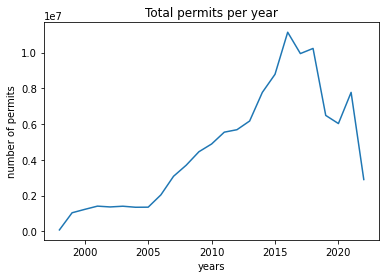

In [32]:
plt.plot(yearly_permit['years'] ,yearly_permit['permit'] )
plt.xlabel('years')
plt.ylabel('number of permits')
plt.title('Total permits per year');

#### this visualizion show relation between number of permits as an insight about drug possession and time per year (postive correlation is found) 

In [28]:
yearly_permit_sorted=yearly_permit.sort_values('permit', ascending=False)

In [29]:
yearly_permit_sorted.head()

,years,permit
18,2016,11134651.0
20,2018,10229162.0
19,2017,9941684.0
17,2015,8782048.0
23,2021,7770874.0


## Answer:- The year which has the highest permits is (2016) by about (11,134,651)

#### what are the events that lead to decreased numbers of permits  after 2016 ?? we can't figure it out

## Research Question 2  top five states that have gun permits?

#### knowing the most common states that have gun permits let us look for deep problems and where are these problem really profound 
#### knowing which states have higher permits than others is rising many other question like why ? is it related to (high crime rates , high salaries , unemployment ? these are all valid questions about these states


#### we have already sorted the data from highest to lowest permits in step 8
###### (8- sorting totalpermit_state from highest to lowest according to sum of permits)

In [30]:
totalpermit_state.head()

,state,permit
18,Kentucky,32533977.0
14,Illinois,13670251.0
4,California,8261028.0
35,North Carolina,5691209.0
46,Texas,4757312.0


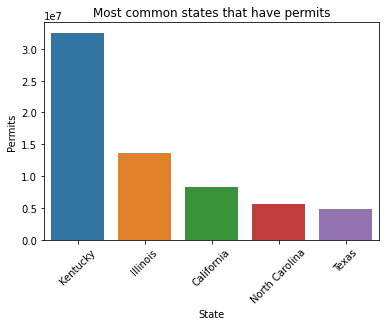

In [31]:
fig, ax = plt.subplots();
sns.barplot(data=totalpermit_state.head(),x='state',y='permit')
plt.xticks(rotation=45);
plt.xlabel('State')
plt.ylabel('Permits')
plt.title('Most common states that have permits');

#### the visualization above shows top five states in x axis and number of permits in 1x10**7

## Answer:- 
#### 1- Kentucky 2-Illinois 3-California 4-North Carolina 5-Texas

<a id='conclusions'></a>
## Conclusions

>  I have found that from 1998 to 2016 the gun permits were increasing throught years till reached maximum at 2016 then for some reason -that needs to be investigated- the trend began to go down to some degree from 2017 to 2022 as you can see in the first question.


> In the secound question i tried to figure out which states that has the highest gun permits over the period from 1998 to 2022 -which are (1- Kentucky 2-Illinois 3-California 4-North Carolina 5-Texas)

> The most important limitation in this study is that the data provided in my analysis is not a direct representative of gun sales and don't include (rechecks ,types of guns ,multiple gun permits ,rentals ,private selling)



